# Hackaton RTT  - ML

## Run the experiment

In [222]:
!./test.sh 1 0.5
!./test.sh 2 0.5
!./test.sh 3 0.5
!./test.sh 4 0.5

running test 1 with alpha 0.5
waiting for the sender to finish
Test finished
running test 2 with alpha 0.5
waiting for the sender to finish
Test finished
running test 3 with alpha 0.5
waiting for the sender to finish
Test finished
running test 4 with alpha 0.5
waiting for the sender to finish
Test finished


##  Load data

In [214]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

plt.rcParams['figure.figsize'] = [15, 5]

def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

def get_rtts(dir):
    files = [f for f in listdir(dir) if isfile(join(dir, f))]
    rtts = [np.loadtxt(join(dir,f), delimiter=',') for f in files]
    rtts_measured = [rtt[:,0] for rtt in rtts]
    rtts_estimated = [rtt[:,1] for rtt in rtts]
    return (rtts_measured, rtts_estimated, rtts)

def get_error(rtts):
    err = [ np.mean(np.abs(rtt[:,0] - rtt[:,1])) for rtt in rtts]
    return err
        



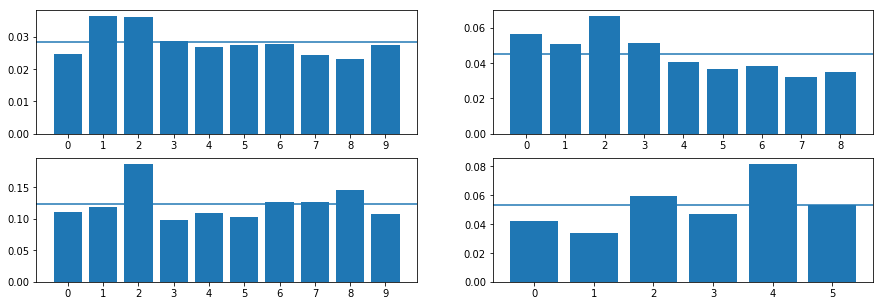

In [249]:

for test in range(1,5):
        plt.subplot(2,2,test)
        rtts_measured, rtts_estimated, rtts = get_rtts("results_{0}".format(test))
        err = get_error(rtts)
        ind = np.arange(0, len(err), 1)
        plt.bar(ind,err);
        plt.xticks(ind);
        plt.axhline(y=np.mean(err));





In [250]:
rtts_measured, rtts_estimated, rtts = get_rtts("results_1")

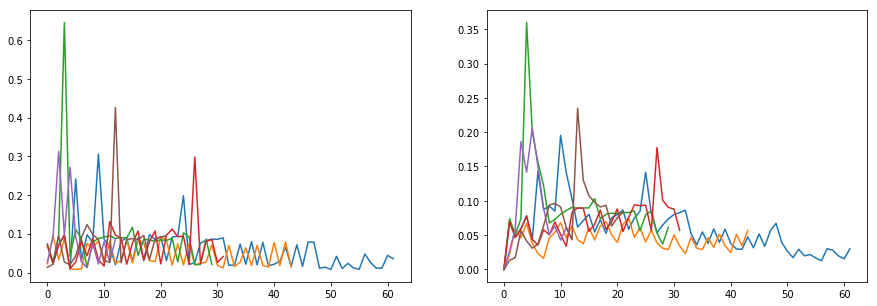

In [242]:
plt.subplot(1,2,1)

for rtt in rtts_measured:
    plt.plot(rtt)
    
plt.subplot(1,2,2)
for rtt in rtts_estimated:
    plt.plot(rtt)


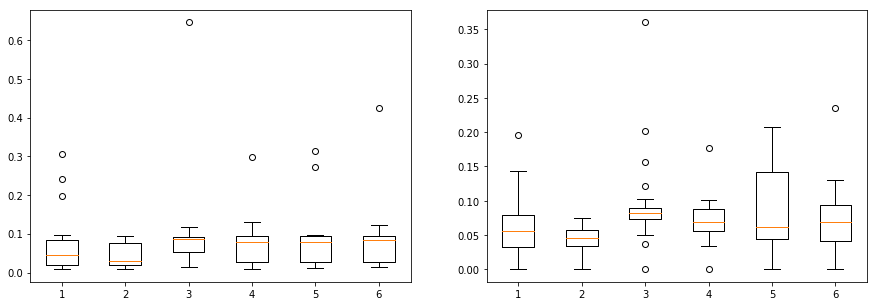

In [243]:
plt.subplot(1,2,1)
plt.boxplot(rtts_measured);

plt.subplot(1,2,2)
plt.boxplot(rtts_estimated);

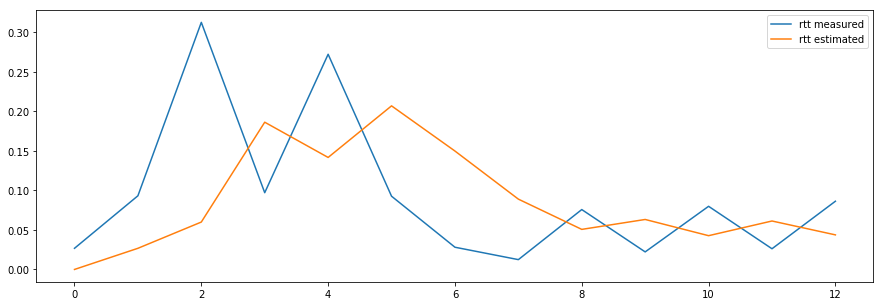

In [245]:
plt.plot(rtts_measured[4], label="rtt measured");
plt.plot(rtts_estimated[4], label="rtt estimated");
plt.legend();